In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def _conv(img: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    # calculating output size
    output_height = img.shape[0] - kernel.shape[0] + 1
    output_width = img.shape[1] - kernel.shape[1] + 1
    output = np.zeros((output_height, output_width))

    for h_index in range(output_height):
        for w_index in range(output_width):
            output[h_index, w_index] = np.sum(img[h_index:(h_index+kernel.shape[0]), w_index:(w_index+kernel.shape[1])] * kernel)

    return output

In [4]:
gauss_kernel = np.asarray([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, 26, 24, 6], [1, 4, 6, 4, 1], [4, 16, 24, 16, 4]])
gauss_kernel_coefficient = 1 / 256

(252, 252)

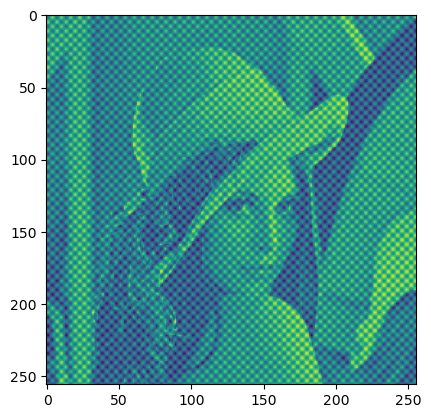

In [29]:
lena_gray = cv2.imread('lena_gray_256_noisy.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(lena_gray)
lena_gray_gauss_filtered = np.around(_conv(lena_gray, gauss_kernel_coefficient * gauss_kernel))
lena_gray_gauss_filtered.shape

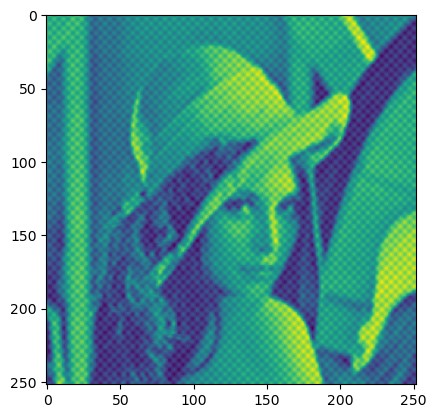

In [26]:
lena_gray_gauss_filtered
plt.imshow(lena_gray_gauss_filtered)

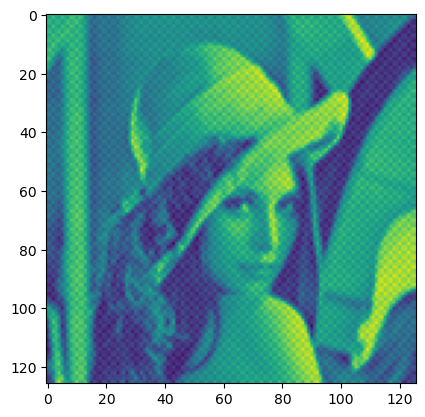

In [12]:
idx = list(range(1, 253, 2))
pyr = lena_gray_gauss_filtered[idx, :][:, idx]
plt.imshow(pyr)